# Think Bayes

This notebook presents example code and exercise solutions for Think Bayes.

Copyright 2016 Allen B. Downey

MIT License: https://opensource.org/licenses/MIT

In [34]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import classes from thinkbayes2
from thinkbayes2 import Pmf, Suite, Joint, MakePoissonPmf, MakeNormalPmf, MakeMixture, MakeJoint

import numpy as np

import thinkplot

from scipy.special import gamma

# 1

In [16]:
def pdf(x,k,theta):
    return 1/(gamma(k)*(theta**k)) * (x**(k-1)) * np.exp(-x/theta)

pdf(2,3,2);

0.09196986029286058

 # 2

In [76]:
kPrior = MakeNormalPmf(0,0.5,4);
thetaPrior = MakeNormalPmf(0,4,4);
kPrior = Pmf({k:v for k,v in kPrior.Items() if k>0});
thetaPrior = Pmf({k:v for k,v in thetaPrior.Items() if k>0});

prior = MakeJoint(kPrior,thetaPrior);

class rain(Suite,Joint):
    def Likelihood(self,data,hypo):
        k,theta = hypo
        data = np.array(data)
        return np.product(pdf(data,k,theta))
    
suite = rain(prior);
suite.Update([0.78,0.87,0.64]);

print("Prior mean for k %.2f"%kPrior.Mean())
print("Prior mean for theta %.2f"%thetaPrior.Mean())

print("Posterior mean for k %.2f"%suite.Marginal(0).Mean())
print("Posterior mean for theta %.2f"%suite.Marginal(1).Mean())

Prior mean for k 0.41
Prior mean for theta 3.24
Posterior mean for k 0.65
Posterior mean for theta 2.48


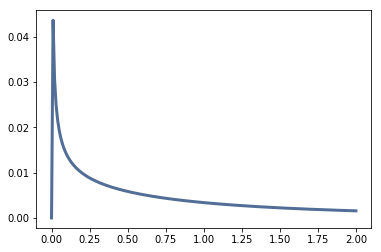

In [86]:
mixture = Pmf();
vals = np.linspace(0,2,200);
for (k,theta),p in suite.Items():
    partialPmf = Pmf({v:pdf(v,k,theta) for v in vals[1:]})
    partialPmf[0]=0
    mixture[partialPmf]=p
    
mixture = MakeMixture(mixture);
thinkplot.Pdf(mixture)

In [84]:
mixture

Pmf({0.0: nan, 0.010050251256281407: 0.000915878062793308, 0.020100502512562814: 0.000983360886001896, 0.03015075376884422: 0.001022547636320743, 0.04020100502512563: 0.0010486490155145413, 0.05025125628140704: 0.001066966423748639, 0.06030150753768844: 0.00108004944626821, 0.07035175879396985: 0.0010893458235239485, 0.08040201005025126: 0.0010957673795947156, 0.09045226130653267: 0.0010999308159991771, 0.10050251256281408: 0.0011022755289210955, 0.11055276381909548: 0.0011031272660496857, 0.12060301507537688: 0.001102735181179169, 0.1306532663316583: 0.0011012946971151346, 0.1407035175879397: 0.0010989622891524533, 0.15075376884422112: 0.001095865420388625, 0.16080402010050251: 0.001092109438386078, 0.1708542713567839: 0.0010877824962024474, 0.18090452261306533: 0.0010829591480567425, 0.19095477386934673: 0.0010777030314511472, 0.20100502512562815: 0.0010720689045222941, 0.21105527638190955: 0.0010661042187223326, 0.22110552763819097: 0.0010598503503550937, 0.23115577889447236: 0.0010